In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

In [8]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [9]:
region_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [10]:
df = df.merge(region_df,on='NOC',how='left')

In [11]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [13]:
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [14]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index().head(25)

C:\Users\irsmj\AppData\Local\Temp\ipykernel_19496\1751710088.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index().head(25)


,NOC,Gold,Silver,Bronze
0,USA,2638,1641,1358
1,URS,1082,732,689
2,GER,745,674,746
3,GBR,678,739,651
4,ITA,575,531,531
5,FRA,501,610,666
6,SWE,479,522,535
7,CAN,463,438,451
8,HUN,432,332,371
9,GDR,397,327,281


In [20]:
df[(df['NOC'] == 'IND') & (df['Medal'] == 'Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4732,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4736,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
5032,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
5033,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
5034,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233749,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
236445,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
236446,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
250689,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


In [26]:
gold_medalists = df[df.Medal == 'Gold']
gold_medalists.describe()

,ID,Age,Height,Weight,Year,Bronze,Gold,Silver
count,13372.000000,13224.000000,10539.000000,10254.000000,13372.000000,13372.0,13372.0,13372.0
mean,69358.276473,25.901013,177.898472,74.183879,1973.131618,0.0,1.0,0.0
std,39029.340607,5.892887,11.052521,15.207425,34.179153,0.0,0.0,0.0
min,4.000000,13.000000,136.000000,28.000000,1896.000000,0.0,1.0,0.0
25%,36055.250000,22.000000,170.000000,63.000000,1952.000000,0.0,1.0,0.0
50%,69076.500000,25.000000,178.000000,73.000000,1984.000000,0.0,1.0,0.0
75%,103707.000000,29.000000,185.000000,84.000000,2002.000000,0.0,1.0,0.0
max,135553.000000,64.000000,223.000000,170.000000,2016.000000,0.0,1.0,0.0


Text(0.5, 1.0, 'Distribution of Gold Medals')

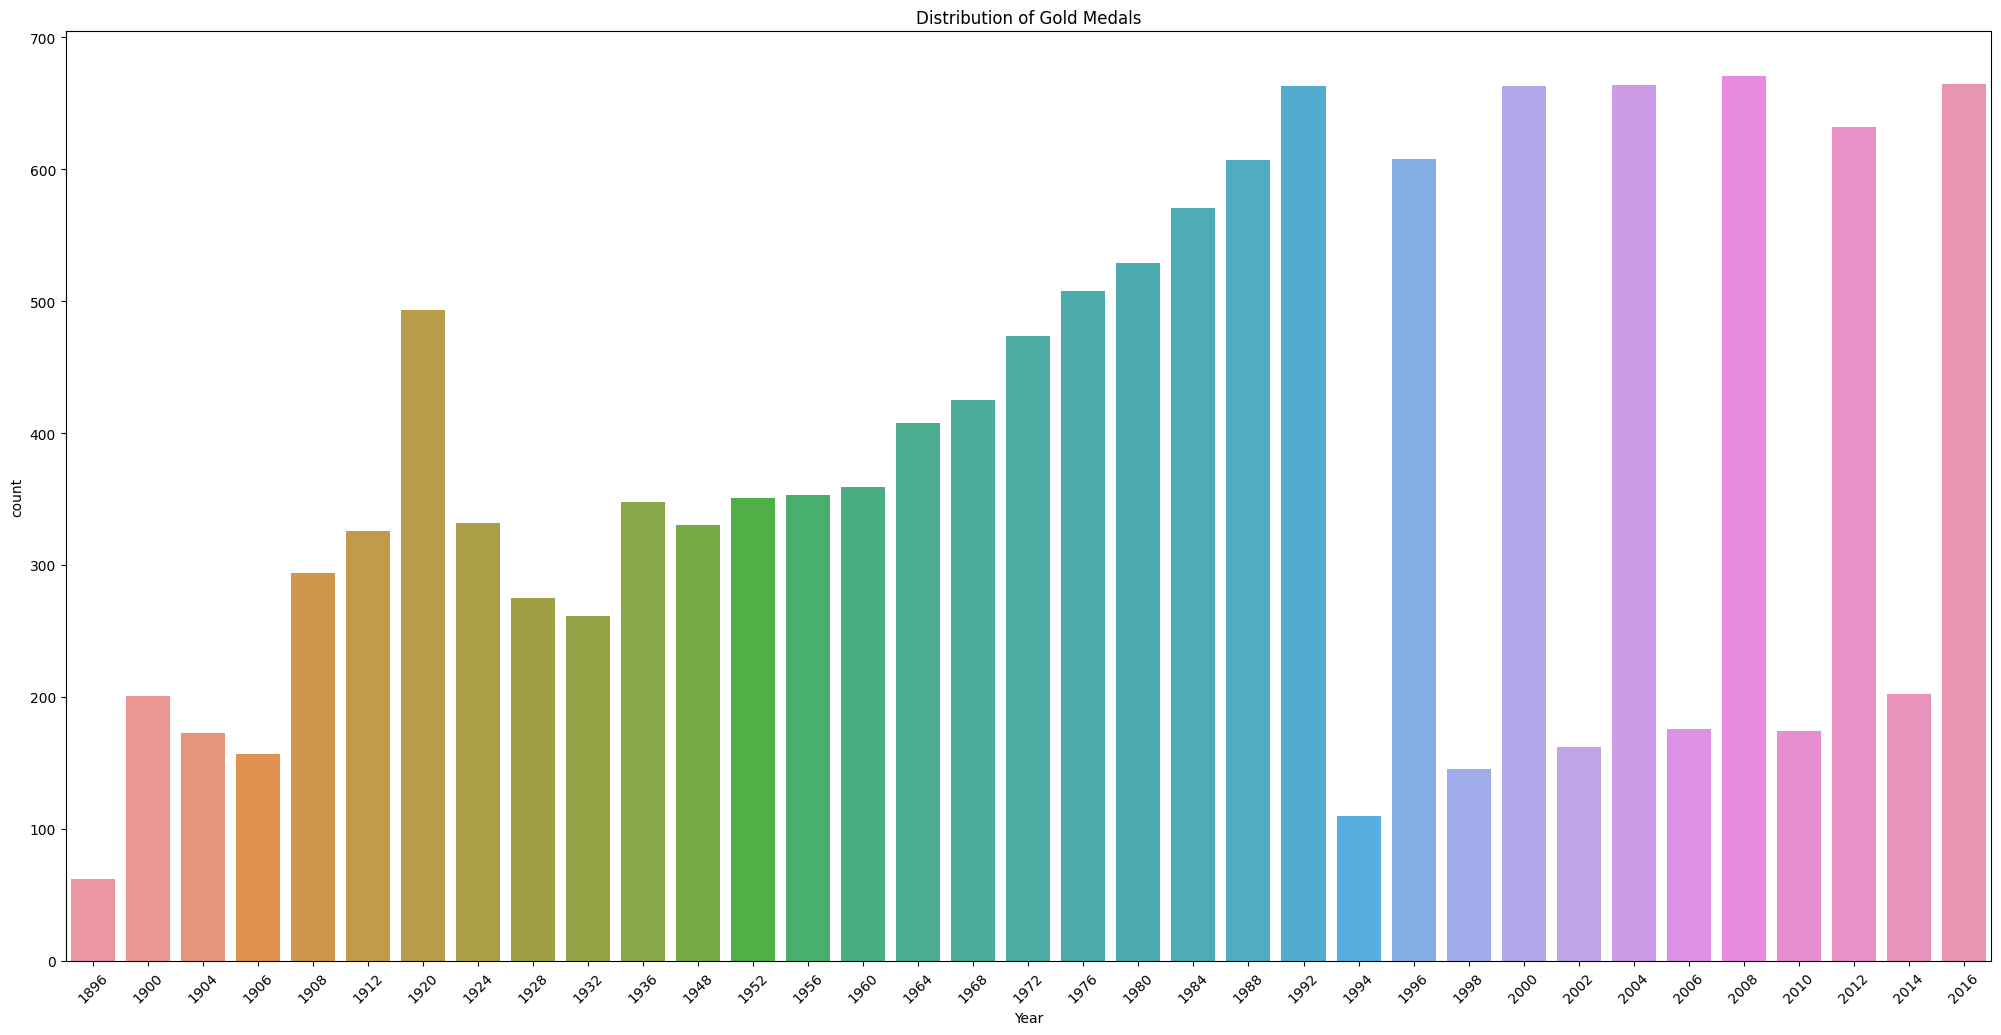

In [31]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
plt.tight_layout()
sns.countplot(data=gold_medalists,x='Year')
plt.title('Distribution of Gold Medals')

Text(0.5, 1.0, 'Distribution of Gold Medals')

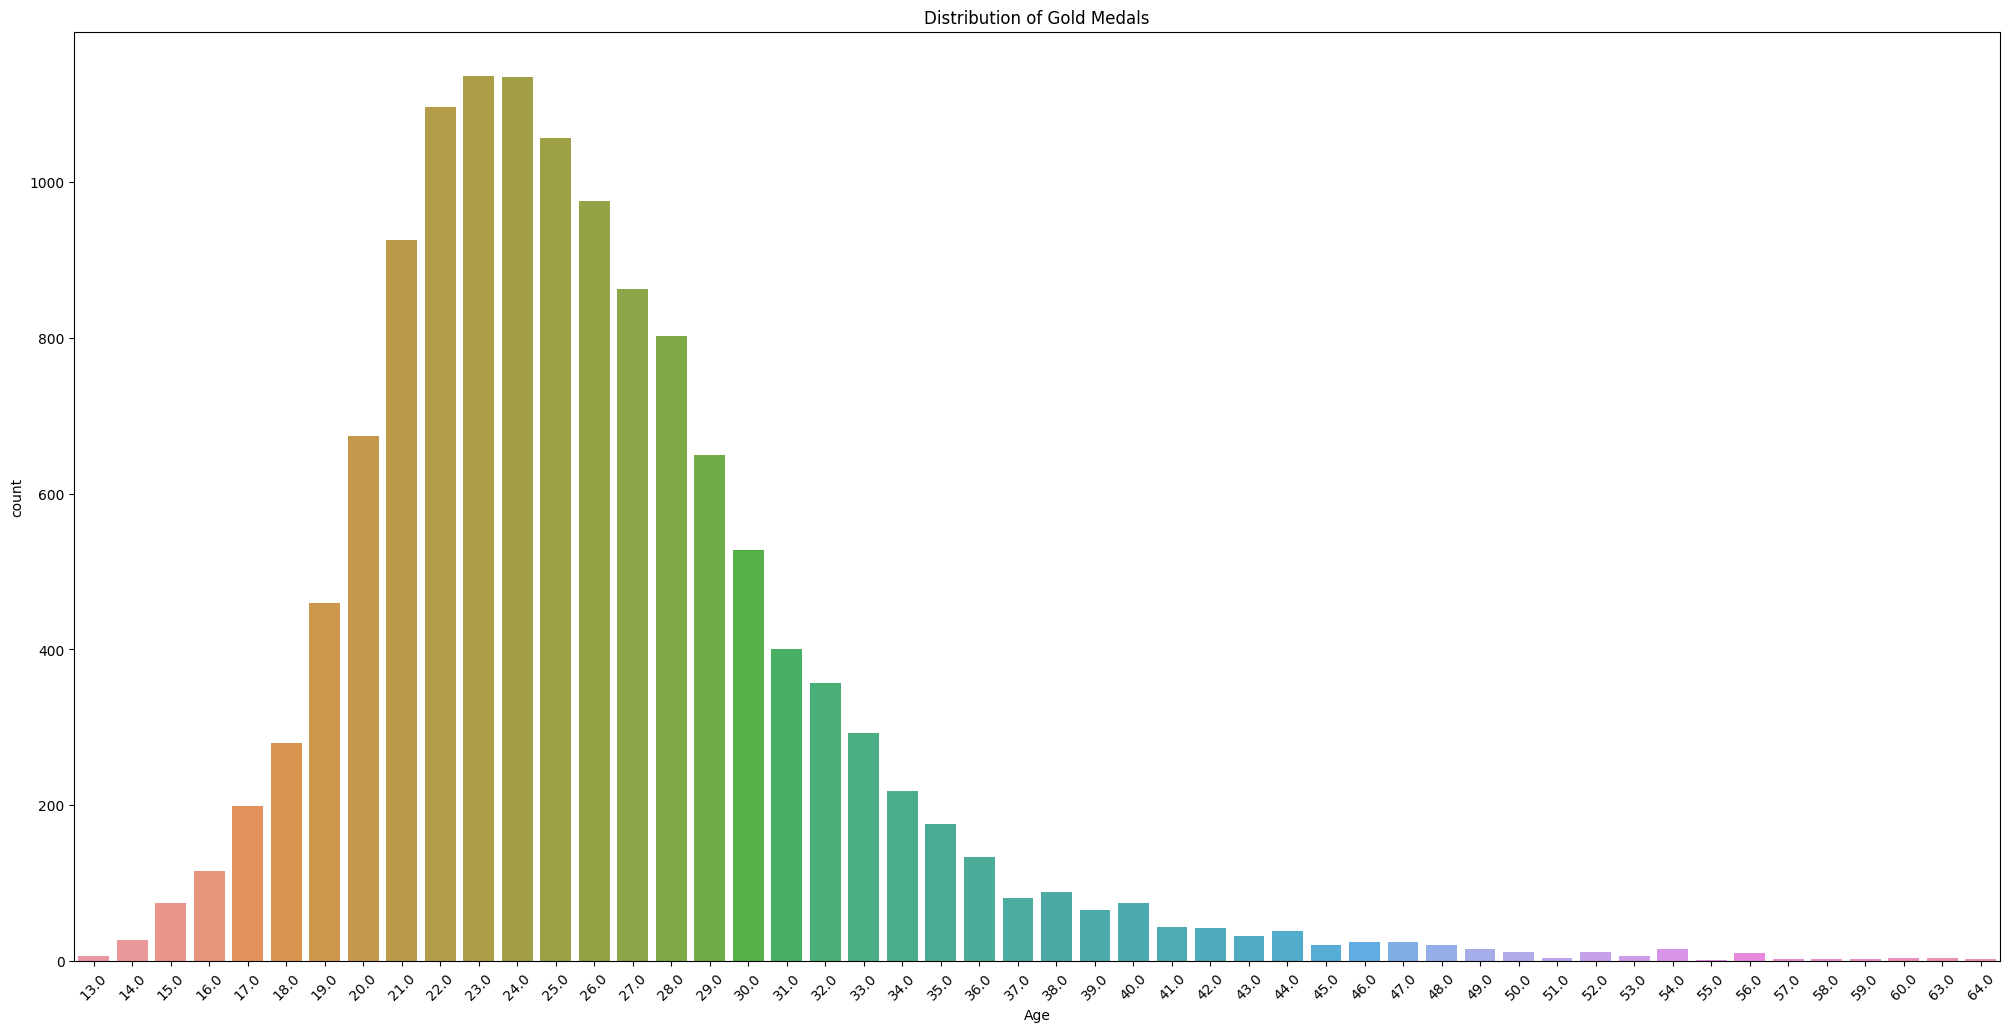

In [32]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
plt.tight_layout()
sns.countplot(data=gold_medalists,x='Age')
plt.title('Distribution of Gold Medals')

Text(0.5, 1.0, 'Distribution of Sex')

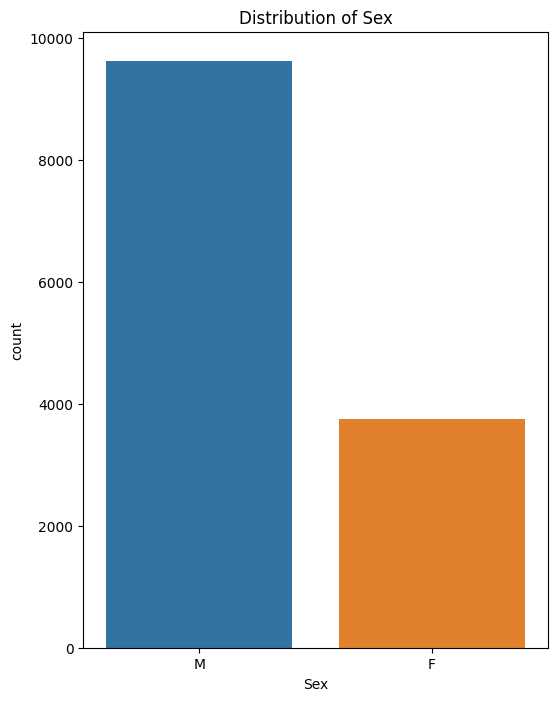

In [33]:
plt.figure(figsize=(6, 8))
plt.tight_layout()
sns.countplot(data=gold_medalists,x='Sex')
plt.title('Distribution of Sex')

In [35]:
medal_country = gold_medalists.region.value_counts().reset_index(name='Medal').head(10)
medal_country

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575
5,France,501
6,Sweden,479
7,Canada,463
8,Hungary,432
9,Norway,378


KeyError: 'region'

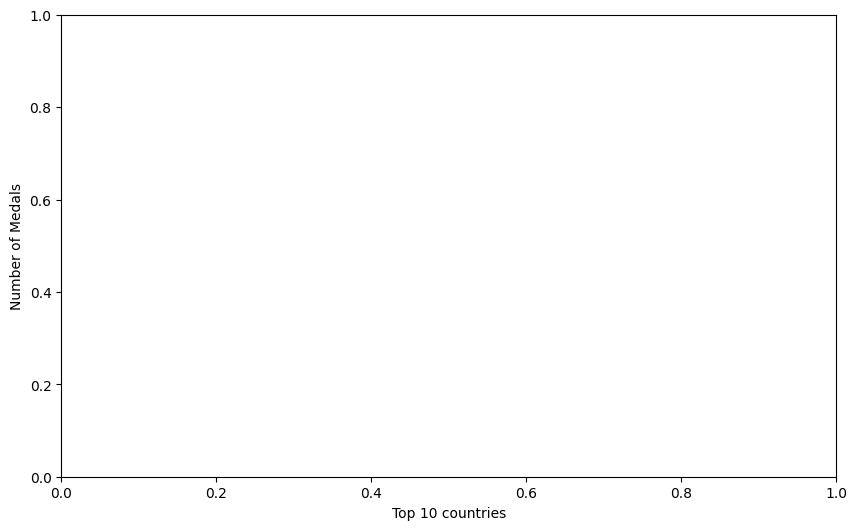

In [39]:
plt.figure(figsize=(10, 6)) 
plt.xlabel('Top 10 countries')
plt.ylabel('Number of Medals')
plt.bar(medal_country['region'], medal_country['Medal'])
plt.title('Medals per Country')
plt.show()